# 1. Load packages and data

### 1.1. Packages

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import glob
from multiprocessing import Pool, cpu_count

### 1.2. Paths

In [60]:
# Define the path to synchronized data directory
script_dir = os.path.dirname(os.path.abspath('__file__'))
synchronized_dir = os.path.join(script_dir, '..', '..', 'synchronized')
appended_dir = os.path.join(script_dir, '..', '..', 'appended')

### 1.3. Data

In [61]:
# Parallel file reading function
def read_synced_file(file_path):
    df = pd.read_csv(file_path, parse_dates=['utc_timestamp'], date_format='ISO8601')
    print(f'Read {os.path.basename(file_path)}: {df.shape}')
    return df

# Get all CSV files in synchronized directory (already rted chronologically)
print(f'Looking for synchronized files in: {synchronized_dir}')
all_files = sorted(glob.glob(os.path.join(synchronized_dir, 'synced_*.csv')))
print(f'Found {len(all_files)} synchronized files')

# Read files in parallel using all CPU cores minus 1
with Pool(cpu_count() - 1) as pool:
    dfs = pool.map(read_synced_file, all_files)

# Concatenate all dataframes at once (preserving chronological order)
full_synced_df = pd.concat(dfs, ignore_index=True)
print(f'Total shape after appending: {full_synced_df.shape}')
print(f'Date range: {full_synced_df["utc_timestamp"].min()} to {full_synced_df["utc_timestamp"].max()}')

# Display first few rows
full_synced_df.head()

Looking for synchronized files in: /work/Thesis/Master-s-thesis/code/data/cleaning-scripts/notebooks/../../synchronized
Found 519 synchronized files
Read synced_2024-01-24_11-33-00_to_2024-01-24_14-38-50.csv: (744, 37)
Read synced_2024-02-29_17-02-30_to_2024-02-29_19-57-15.csv: (700, 37)Read synced_2024-02-02_00-23-15_to_2024-02-02_04-35-45.csv: (1011, 37)

Read synced_2024-01-05_22-59-15_to_2024-01-06_05-59-30.csv: (1681, 37)Read synced_2024-03-31_11-59-15_to_2024-03-31_13-59-15.csv: (481, 37)

Read synced_2024-03-07_02-49-30_to_2024-03-07_04-59-15.csv: (520, 37)
Read synced_2024-01-27_06-28-15_to_2024-01-27_15-29-45.csv: (2166, 37)Read synced_2024-02-24_11-44-15_to_2024-02-24_15-26-00.csv: (888, 37)Read synced_2024-01-28_17-12-45_to_2024-01-28_21-12-30.csv: (960, 37)Read synced_2024-01-13_00-59-15_to_2024-01-13_03-28-30.csv: (598, 37)Read synced_2024-01-31_01-59-15_to_2024-01-31_04-20-30.csv: (566, 37)Read synced_2024-01-22_20-19-45_to_2024-01-23_00-35-30.csv: (1023, 37)Read synced_2

,utc_timestamp,seg_id,2::0::6::1_1::1::0::2::0_1::0::1::0_8,2::0::7::0_1::1::0::2::0_1::0::5::11_8,2::0::1::0_1::1::0::7::0_1::0::4::22_8,2::0::1::0_1::1::0::7::0_2::0::15::22_8,2::0::5::0_1::1::0::2::0_2::0::8::21_8,2::0::5::0_1::1::0::2::0_6::0::1::0_8,1::0::15::0_1::2::0::3::0_1::0::6::0_8,1::0::14::0_1::2::0::8::0_3::0::3::0_8,...,4::0::4::0_1::1::0::7::0_2::0::15::21_8,4::0::4::0_1::1::0::7::0_45::0::2::0_8,4::0::8::0_1::1::0::7::0_4::0::12::0_8,4::0::8::0_1::1::0::7::0_2::0::18::21_8,4::0::4::0_1::1::0::7::0_56::0::3::0_8,4::0::8::0_1::1::0::7::0_40::0::2::0_8,4::0::4::0_1::1::0::7::0_1::0::4::21_8,4::0::8::0_1::1::0::7::0_56::0::4::0_8,4::0::8::0_1::1::0::7::0_45::0::1::0_8,4::0::8::0_1::1::0::7::0_56::0::6::0_8
0,2024-01-01 01:59:15.011000+00:00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-01-01 01:59:30.011000+00:00,2,0.0,0.10,0.540000,72.000000,120.22,0.520,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-01-01 01:59:45.011000+00:00,2,0.0,0.08,1.280000,343.400000,120.30,0.560,14.419556,0.023865,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-01-01 02:00:00.011000+00:00,2,0.0,0.02,0.620000,317.600000,120.30,0.325,14.305115,0.023865,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-01-01 02:00:15.011000+00:00,2,0.0,0.00,0.322222,137.111111,120.10,-0.420,14.400483,0.023865,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
full_unsynced_df = pd.read_csv(os.path.join(appended_dir, 'excl_noon_reports.csv'), parse_dates=['utc_timestamp'], date_format='ISO8601')
full_unsynced_df.head()

,utc_timestamp,qid_mapping,value,quantity_name,source_name,unit,time_delta_sec
0,2024-01-01 00:00:00+00:00,4::0::8::0_1::1::0::7::0_56::0::3::0_8,-0.4000,Vessel External Conditions Eastward Sea Water ...,Provider S,m/s,NaN
1,2024-01-01 00:00:00+00:00,4::0::4::0_1::1::0::7::0_56::0::4::0_8,0.0000,Vessel External Conditions Northward Sea Water...,Provider MB,m/s,NaN
2,2024-01-01 00:00:00+00:00,4::0::4::0_1::1::0::7::0_45::0::1::0_8,2.7000,Vessel External Conditions Wave Significant He...,Provider MB,m,NaN
3,2024-01-01 00:00:00+00:00,4::0::8::0_1::1::0::7::0_56::0::5::0_8,0.5391,Vessel External Conditions Eastward Wind Velocity,Provider S,m/s,NaN
4,2024-01-01 00:00:00+00:00,4::0::4::0_1::1::0::7::0_2::0::15::21_8,79.0000,Vessel External Conditions Wind True Angle,Provider MB,degrees,NaN


In [64]:
full_unsynced_df['qid_mapping'].unique()

<StringArray>
[ '4::0::8::0_1::1::0::7::0_56::0::3::0_8',
  '4::0::4::0_1::1::0::7::0_56::0::4::0_8',
  '4::0::4::0_1::1::0::7::0_45::0::1::0_8',
  '4::0::8::0_1::1::0::7::0_56::0::5::0_8',
 '4::0::4::0_1::1::0::7::0_2::0::15::21_8',
  '4::0::4::0_1::1::0::7::0_45::0::2::0_8',
  '4::0::8::0_1::1::0::7::0_4::0::12::0_8',
 '4::0::8::0_1::1::0::7::0_2::0::18::21_8',
  '4::0::4::0_1::1::0::7::0_56::0::3::0_8',
  '4::0::8::0_1::1::0::7::0_40::0::2::0_8',
  '4::0::4::0_1::1::0::7::0_1::0::4::21_8',
  '4::0::8::0_1::1::0::7::0_56::0::4::0_8',
  '4::0::8::0_1::1::0::7::0_45::0::1::0_8',
  '4::0::8::0_1::1::0::7::0_56::0::6::0_8',
   '2::0::6::1_1::1::0::2::0_1::0::1::0_8',
  '2::0::7::0_1::1::0::2::0_1::0::5::11_8',
  '2::0::1::0_1::1::0::7::0_1::0::4::22_8',
 '2::0::1::0_1::1::0::7::0_2::0::15::22_8',
  '2::0::4::0_1::1::0::2::0_37::0::2::0_8',
  '2::0::5::0_1::1::0::2::0_2::0::8::21_8',
   '2::0::5::0_1::1::0::2::0_6::0::1::0_8',
  '1::0::15::0_1::2::0::3::0_1::0::6::0_8',
  '1::0::14::0_1::

In [65]:
full_synced_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2013093 entries, 0 to 2013092
Data columns (total 37 columns):
 #   Column                                   Dtype              
---  ------                                   -----              
 0   utc_timestamp                            datetime64[us, UTC]
 1   seg_id                                   int64              
 2   2::0::6::1_1::1::0::2::0_1::0::1::0_8    float64            
 3   2::0::7::0_1::1::0::2::0_1::0::5::11_8   float64            
 4   2::0::1::0_1::1::0::7::0_1::0::4::22_8   float64            
 5   2::0::1::0_1::1::0::7::0_2::0::15::22_8  float64            
 6   2::0::5::0_1::1::0::2::0_2::0::8::21_8   float64            
 7   2::0::5::0_1::1::0::2::0_6::0::1::0_8    float64            
 8   1::0::15::0_1::2::0::3::0_1::0::6::0_8   float64            
 9   1::0::14::0_1::2::0::8::0_3::0::3::0_8   float64            
 10  1::0::25::0_1::2::0::8::0_20::0::1::0_8  float64            
 11  3::0::1::0_1::1::0::2::0_11::0::4::

# 2. Compare timeline from synced file to original data to see if it lines up

In [ ]:
# Definitions
sensor_qids = [
    "3::0::1::0_1::1::0::2::0_11::0::2::0_8",
    "3::0::1::0_1::1::0::2::0_11::0::1::0_8",
    "3::0::1::0_1::2::0::8::0_1::0::6::0_8",
    "3::0::1::0_1::1::0::2::0_11::0::3::0_8",
    "3::0::1::0_1::1::0::2::0_11::0::4::0_8",
    "2::0::1::0_1::1::0::7::0_1::0::4::22_8",
    "2::0::1::0_1::1::0::7::0_2::0::15::22_8",
    "2::0::6::1_1::1::0::2::0_1::0::1::0_8",
    "2::0::5::0_1::1::0::2::0_6::0::1::0_8",
    "2::0::5::0_1::1::0::2::0_2::0::8::21_8",
    "1::0::25::0_1::2::0::8::0_20::0::1::0_8",
    "2::0::7::0_1::1::0::2::0_1::0::5::11_8",
    "2::0::11::0_1::2::0::8::0_22::0::1::1_8",
    "2::0::11::0_1::1::0::3::0_14::0::1::0_8",
    "2::0::11::0_1::1::0::3::0_1::0::6::0_8",
    "2::0::11::0_1::1::0::3::0_12::0::2::0_8",
    "2::0::11::0_1::1::0::3::0_17::0::1::0_8",
    "2::0::11::0_1::1::0::3::0_15::0::1::0_8",
    "2::0::11::0_1::1::0::3::0_12::0::1::0_8",
    "1::0::14::0_1::2::0::8::0_3::0::3::0_8",
    "1::0::15::0_1::2::0::3::0_1::0::6::0_8"
]
weather_qids = [
    "4::0::4::0_1::1::0::7::0_45::0::1::0_8",
    "4::0::4::0_1::1::0::7::0_2::0::15::21_8",
    "4::0::4::0_1::1::0::7::0_45::0::2::0_8",
    "4::0::4::0_1::1::0::7::0_1::0::4::21_8",
    "4::0::4::0_1::1::0::7::0_56::0::3::0_8",
    "4::0::4::0_1::1::0::7::0_56::0::4::0_8",
    "4::0::8::0_1::1::0::7::0_45::0::1::0_8",
    "4::0::8::0_1::1::0::7::0_2::0::18::21_8",
    "4::0::8::0_1::1::0::7::0_40::0::2::0_8",
    "4::0::8::0_1::1::0::7::0_4::0::12::0_8",
    "4::0::8::0_1::1::0::7::0_56::0::6::0_8",
    "4::0::8::0_1::1::0::7::0_56::0::5::0_8",
    "4::0::8::0_1::1::0::7::0_56::0::3::0_8",
    "4::0::8::0_1::1::0::7::0_56::0::4::0_8"
]

start_time = pd.to_datetime("2024-01-01", utc=True)
end_time = pd.to_datetime("2024-01-31", utc=True)

print(f'Number of sensor qids: {len(sensor_qids)}')
print(f'Number of weather qids: {len(weather_qids)}')

Number of sensor qids: 21
Number of weather qids: 14


In [81]:
# Data filtering
def filter_data_by_time_and_qid(synced_df, unsynced_df, qid, start_time, end_time):
    # Filter synced dataframe by time AND keep only rows where the qid column has data (not NaN)
    synced_filtered = synced_df[
        (start_time <= synced_df['utc_timestamp']) & 
        (synced_df['utc_timestamp'] <= end_time) &
        (synced_df[qid].notna())
    ][['utc_timestamp', qid]].copy()

    # Filter unsynced dataframe by time and qid_mapping value
    unsynced_filtered = unsynced_df[
        (start_time <= unsynced_df['utc_timestamp']) &
        (unsynced_df['utc_timestamp'] <= end_time) & 
        (unsynced_df['qid_mapping'] == qid)
    ][['utc_timestamp', 'value']].copy()

    # Rename unsynced 'value' column to match qid name
    unsynced_filtered = unsynced_filtered.rename(columns={'value': qid})

    return synced_filtered, unsynced_filtered

def plot_synced_vs_unsynced(synced_series, unsynced_series, qid):
    plt.figure(figsize=(12, 6))
    plt.plot(synced_series['utc_timestamp'], synced_series[qid], label='Synced')
    plt.plot(unsynced_series['utc_timestamp'], unsynced_series[qid], label='Unsynced')
    plt.title(f'Time Series Comparison for {qid}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.grid()
    plt.show()

def plot_qid_grid(qid_list, synced_df, unsynced_df, start_time, end_time, title=None):
    """Plot a grid of time series comparisons for multiple QIDs.
    
    Args:
        qid_list: List of QID strings to plot
        synced_df: Synchronized dataframe
        unsynced_df: Unsynchronized dataframe
        start_time: Start time for filtering
        end_time: End time for filtering
        title: Optional title for the entire figure
    """
    # Create grid with rows of 3
    nrows = (len(qid_list) + 2) // 3
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(18, 4 * nrows))
    axes = axes.flatten()  # Flatten to 1D array for easy indexing
    
    for idx, qid in enumerate(qid_list):
        synced_filtered, unsynced_filtered = filter_data_by_time_and_qid(
            synced_df, unsynced_df, qid, start_time, end_time
        )
        axes[idx].plot(synced_filtered['utc_timestamp'], synced_filtered[qid], 
                      label='Synced', linewidth=1, alpha=1)
        axes[idx].plot(unsynced_filtered['utc_timestamp'], unsynced_filtered[qid], 
                      label='Unsynced', linewidth=1, alpha=1)
        axes[idx].set_title(f'{qid}', fontsize=9)
        axes[idx].set_xlabel('Time', fontsize=8)
        axes[idx].set_ylabel('Value', fontsize=8)
        axes[idx].legend(fontsize=7)
        axes[idx].grid(True, alpha=0.3)
        axes[idx].tick_params(labelsize=7)
    
    # Hide unused subplots
    for idx in range(len(qid_list), len(axes)):
        axes[idx].set_visible(False)
    
    if title:
        fig.suptitle(title, fontsize=14, y=1.00)
    
    plt.tight_layout()
    plt.show()


KeyError: '2::0::25::0_1::2::0::3::0_1::0::6::0_8'

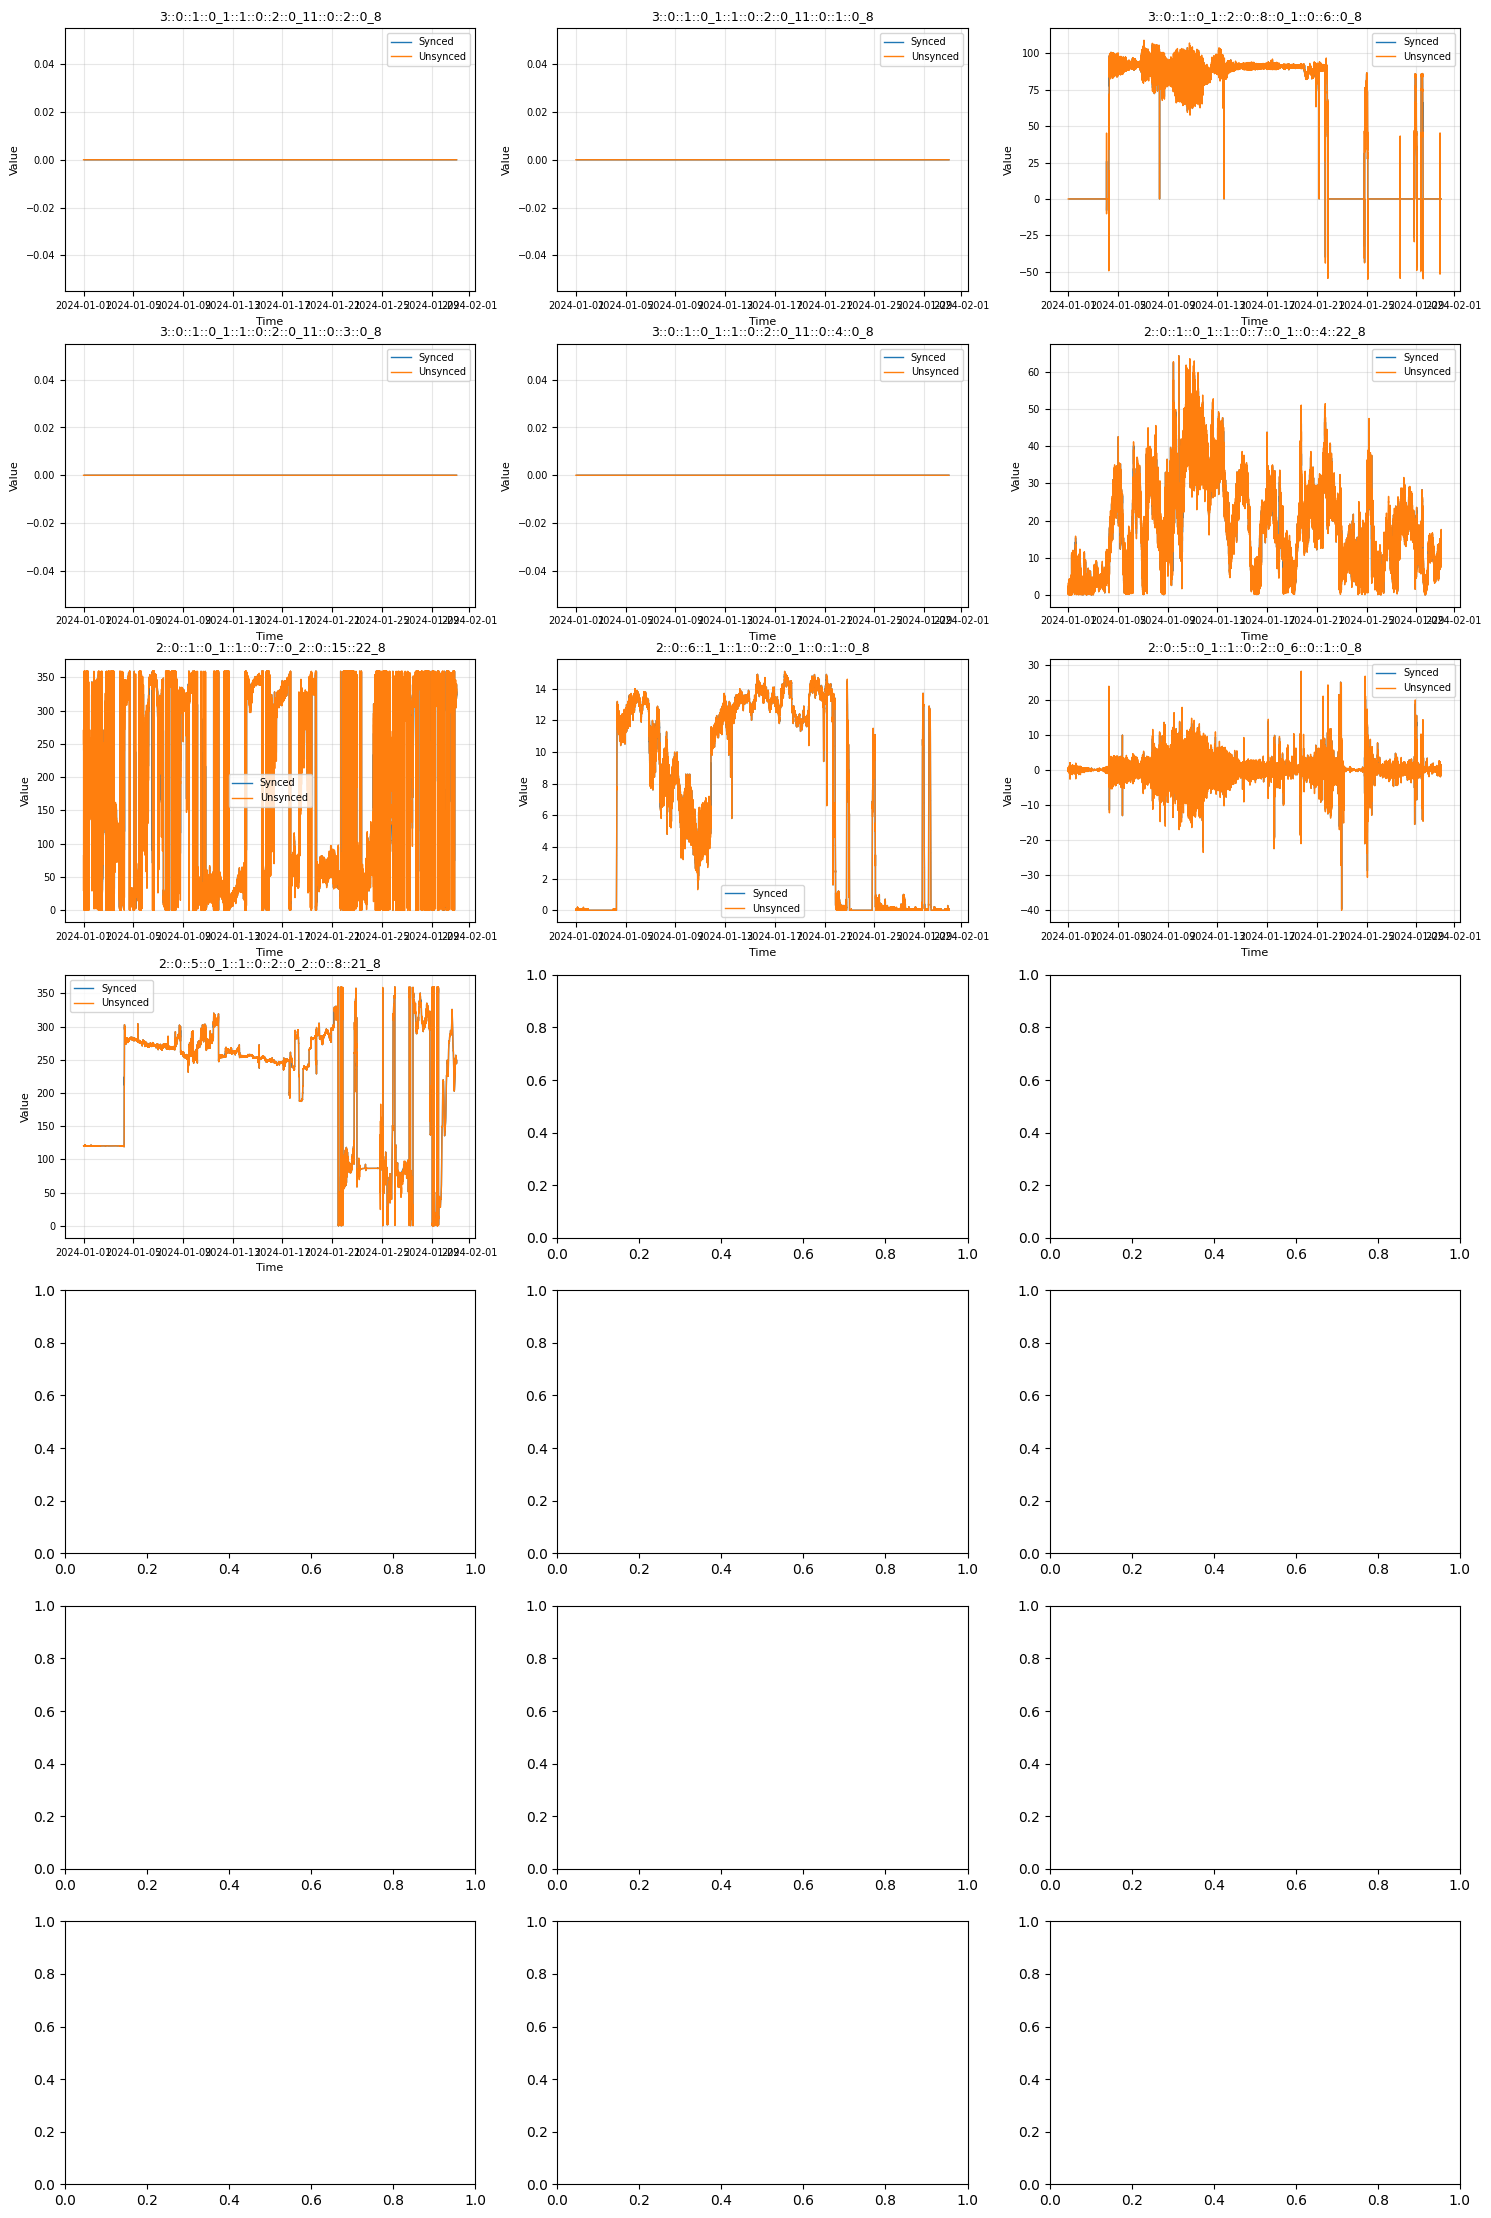

In [82]:
# Plot sensor QIDs comparison
plot_qid_grid(sensor_qids, full_synced_df, full_unsynced_df, start_time, end_time, title='Sensor QIDs: Synced vs Unsynced')


#### Investigate in a bit more detail...

In [ ]:
# Definitions

start_time = pd.to_datetime("2024-01-01", utc=True)
end_time = pd.to_datetime("2024-01-31", utc=True)

#### Repeat for weather

In [ ]:
# Plot weather QIDs comparison
plot_qid_grid(weather_qids, full_synced_df, full_unsynced_df, start_time, end_time, title='Weather QIDs: Synced vs Unsynced')


# 3. Check that distributions of values roughly resemble those in the original version

In [ ]:
# TODO: check that the distributions of values roughly resembles those in the original exploration


# 4. Check distribution of stretch durations

In [ ]:
# TODO: (optional) check distribution of stretch durations